In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Twitter Api Credentials
consumerKey = "a4lI3hGC6aArjwDP3uFxmkV7B"
consumerSecret = "P82i45bd2toHPgutJ3YgBXTX0K3tjqT62oGds83MfUimC486LZ"
accessToken = "1334417545483304960-jgLeBKg3atLpbky42gGRMhw12DedEd"
accessTokenSecret = "IR0WCKwxEavZFUnxcvHVwEADInme6NvEAzktbNx2gqhrm"

In [7]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [16]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="Barcelona", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) @juicelake Due to copyrights, sadly not. Thanks for the love though! There's a few YouTube bootlegs 😏

2) RT @iamkory: Starting the rainy weekend w/ some Saturday morning white vinyl @barcelona vibes 🎶🎶🎶 https://t.co/MTgvouAh6W

3) BASIC MAN on VINYL available now! W/digital download. Orders prior to 12/9 ship before Christmas. Happy Holidays! 

https://t.co/oPqOHRggEy

4) Listen to our new version of "Auld Lang Syne" exclusively on @amazonmusic's #AcousticChristmas playlist! 🌲
https://t.co/R4ZFYxH2Ol

5) RT @anaid1319: @barcelona https://t.co/RavRoEwzF4



In [17]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,"@juicelake Due to copyrights, sadly not. Thank..."
1,RT @iamkory: Starting the rainy weekend w/ som...
2,BASIC MAN on VINYL available now! W/digital do...
3,"Listen to our new version of ""Auld Lang Syne"" ..."
4,RT @anaid1319: @barcelona https://t.co/RavRoEwzF4


In [18]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,"Due to copyrights, sadly not. Thanks for the ..."
1,: Starting the rainy weekend w/ some Saturday ...
2,BASIC MAN on VINYL available now! W/digital do...
3,"Listen to our new version of ""Auld Lang Syne"" ..."
4,1319:
...,...
91,"_14: also in Italy, you are with me! loveyou ..."
92,OH yeah!
93,: I've been listening to for seven years. Pre...
94,: StaffPick Get some 2nd kiss goodness with a...


In [19]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,"Due to copyrights, sadly not. Thanks for the ...",0.318750,0.050000
1,: Starting the rainy weekend w/ some Saturday ...,0.050000,0.000000
2,BASIC MAN on VINYL available now! W/digital do...,0.381250,0.375000
3,"Listen to our new version of ""Auld Lang Syne"" ...",0.454545,0.170455
4,1319:,0.000000,0.000000
...,...,...,...
91,"_14: also in Italy, you are with me! loveyou ...",0.200000,-0.300000
92,OH yeah!,0.000000,0.000000
93,: I've been listening to for seven years. Pre...,0.875000,0.159091
94,: StaffPick Get some 2nd kiss goodness with a...,0.000000,0.000000


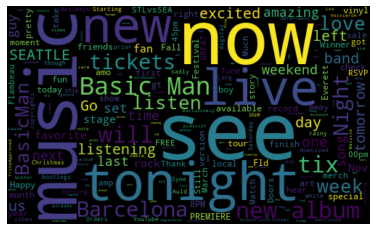

In [20]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [22]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):

    
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,"Due to copyrights, sadly not. Thanks for the ...",0.318750,0.050000,Positive
1,: Starting the rainy weekend w/ some Saturday ...,0.050000,0.000000,Neutral
2,BASIC MAN on VINYL available now! W/digital do...,0.381250,0.375000,Positive
3,"Listen to our new version of ""Auld Lang Syne"" ...",0.454545,0.170455,Positive
4,1319:,0.000000,0.000000,Neutral
...,...,...,...,...
91,"_14: also in Italy, you are with me! loveyou ...",0.200000,-0.300000,Negative
92,OH yeah!,0.000000,0.000000,Neutral
93,: I've been listening to for seven years. Pre...,0.875000,0.159091,Positive
94,: StaffPick Get some 2nd kiss goodness with a...,0.000000,0.000000,Neutral


In [24]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1)  Due to copyrights, sadly not. Thanks for the love though! There's a few YouTube bootlegs 😏

2) BASIC MAN on VINYL available now! W/digital download. Orders prior to 12/9 ship before Christmas. Happy Holidays! 



3) Listen to our new version of "Auld Lang Syne" exclusively on 's AcousticChristmas playlist! 🌲


4) Our first music video from Basic Man premieres today on : 

5) : gonna leave u w/ In The Night by  from the new album Basicman until next week, u take care bye 4 now Qatarradio ht…

6) 69: If I haven't mentioned it already, take note:  's new album BasicMan is out-standing! TrinaApproved 🙌 ♫ 

7) : Massive congratulations to our old friends  on their beautiful new album Basic Man. Out now, check it out!

8) : Actual footage of me listening to the new Barcelona album right now

BasicMan  

9) : Diving in to the new  record BasicMan. Ready to dance, but will probably just end in tears. 

10) :  Me listening to Basic Man right now 

11) OUR NEW ALBU

In [25]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) ! See you tonight at 8PM, let's. get. dangerous...

2) _Fld: Seattle indie rock band  will perform at  game on 12/28! STLvsSEA 



3) Only a few days left in our big ol' merch sale!! 

4)  💩 My bad 🙈 We got em at  👊

5) : _cfp _hebert @_teeeeraw the awkward moment when chris tweets to  and they're a band or something …

6) _14:  also in Italy, you are with me! loveyou barcelona melodrama fallinlove 



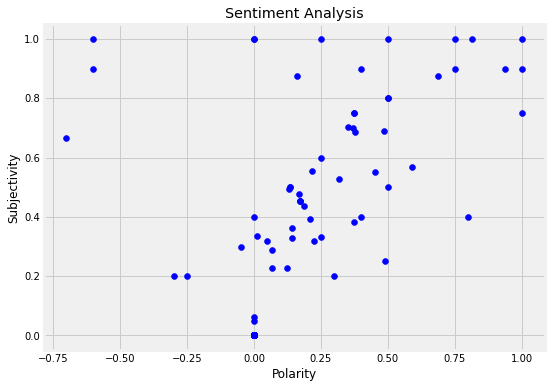

In [26]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [27]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

51.0

In [28]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)


6.2

In [29]:
# Show the value counts
df['Analysis'].value_counts()

Positive    49
Neutral     41
Negative     6
Name: Analysis, dtype: int64

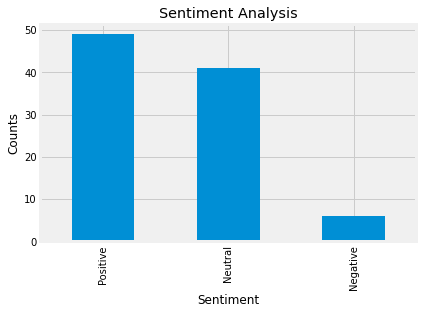

In [30]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

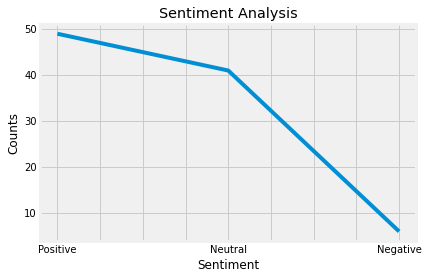

In [32]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'line')
plt.show()